In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3l4eWFuZy9Eb2N1bWVudHMvQ291cnNlcy8yMDI1XzI2X0ZhbGwvUVRNMzUwL3F0bTM1MC1maW5hbC1wcm9qZWN0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/yxyang/anaconda3/lib/python3.11/importlib/_bootstrap.py": 1694439389.41593, "/Users/yxyang/anaconda3/lib/python3.11/importlib/_bootstrap_external.py": 1694439389.4256217, "/Users/yxyang/anaconda3/lib/python3.11/zipimport.py": 1694439385.7741373, "/Users/yxyang/anaconda3/lib/python3.11/codecs.py": 1694439384.781692, "/Users/yxyang/anaconda3/lib/python3.11/encodings/aliases.py": 1694439387.126954, "/Users/yxyang/anaconda3/lib/python3.11/encodings/__init__.py": 1694439387.119218, "/Users/yxyang/anaconda3/lib/python3.11/encodings/utf_8.py": 1694439388.3518095, "/Users/yxyang/anaconda3/lib/python3.11/abc.py": 1694439384.644435, "/Users/yxyang/anaconda3/lib/python3.11/io.py": 1694439385.0425074, "/Users/yxyang/anaconda3/lib/python3.11/stat.py": 1694439385.5135145, "/Users/yxyang/anaconda3/lib/python3.11/_collections_abc.py": 1694439384.5167792, "/Users/yxyang/anaconda3/lib/python3.11/genericpath.py": 1694439384.929408, "/Users/yxyang/anaconda3/lib/python3.11/posixpath.py": 169443938

In [2]:
import sqlite3
import pandas as pd

df = pd.read_csv("data/wdi_edu_filtered_long.csv")
conn = sqlite3.connect("wdi_edu.db")
df.to_sql("wdi_edu", conn, if_exists="replace", index=False)

pd.read_sql('''
SELECT 
    series,
    AVG(value) AS mean_rate,
    MIN(value) AS min_rate,
    MAX(value) AS max_rate
FROM wdi_edu
WHERE year BETWEEN 2000 AND 2020
GROUP BY series;
''', conn)

,series,mean_rate,min_rate,max_rate
0,primary,101.106546,79.473808,118.426079
1,primary_female,99.523326,73.061752,125.894310
2,primary_male,102.625246,85.790840,117.201439
3,secondary,73.880423,25.435600,105.108917
4,secondary_female,72.962301,22.674450,104.589317
5,secondary_male,74.752978,28.168131,105.600121
6,tertiary,36.725496,4.384480,86.950279
7,tertiary_female,39.691699,3.595470,101.383179
8,tertiary_male,33.892155,5.179770,74.362297


In [3]:
pd.read_sql('''
WITH growth AS (
    SELECT
        region,
        series,
        AVG(annual_growth) AS avg_growth
    FROM (
        SELECT
            region,
            series,
            value - LAG(value) OVER (PARTITION BY region, series ORDER BY year)
                AS annual_growth
        FROM wdi_edu
        WHERE year BETWEEN 2000 AND 2020
          AND series IN ('primary','secondary','tertiary')
    ) g
    WHERE annual_growth IS NOT NULL
    GROUP BY region, series
)
SELECT
    region,
    MAX(CASE WHEN series = 'primary' THEN avg_growth END) AS primary_growth,
    MAX(CASE WHEN series = 'secondary' THEN avg_growth END) AS secondary_growth,
    MAX(CASE WHEN series = 'tertiary' THEN avg_growth END) AS tertiary_growth
FROM growth
GROUP BY region
ORDER BY region;
''', conn)

,region,primary_growth,secondary_growth,tertiary_growth
0,East Asia & Pacific,-0.508122,1.387767,1.804751
1,Europe & Central Asia,-0.166644,0.397700,1.491138
2,Latin America & Caribbean,-0.489661,0.886855,1.552549
3,"Middle East, North Africa, Afghanistan & Pakistan",0.528657,0.525619,0.737428
4,North America,-0.031169,0.326427,0.971567
5,South Asia,0.233246,1.474988,0.949892
6,Sub-Saharan Africa,0.921688,0.963458,0.240672
7,World,0.025631,0.851748,1.011157


In [4]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Convergence Lines
converge_line_primary = mpimg.imread("figures/primary_convergence_lines_colored.png")
converge_line_secondary = mpimg.imread("figures/secondary_convergence_lines_colored.png")
converge_line_tertiary = mpimg.imread("figures/tertiary_convergence_lines_colored.png")

# Convergence Bars
converge_bar_primary = mpimg.imread("figures/primary_convergence_barplot_colored.png")
converge_bar_secondary = mpimg.imread("figures/secondary_convergence_barplot_colored.png")
converge_bar_tertiary = mpimg.imread("figures/tertiary_convergence_barplot_colored.png")

# Gender Gap 
gpi_primary = mpimg.imread("figures/gpi_trend_primary.png")
gpi_secondary = mpimg.imread("figures/gpi_trend_secondary.png")
gpi_tertiary = mpimg.imread("figures/gpi_trend_tertiary.png")

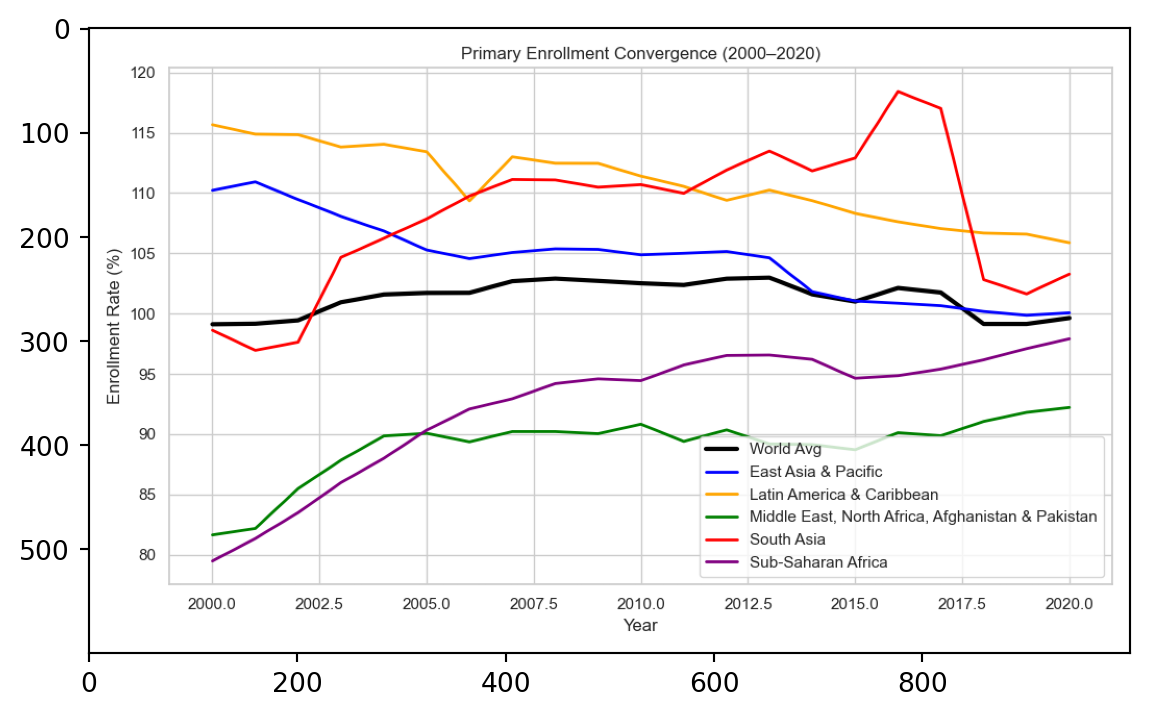

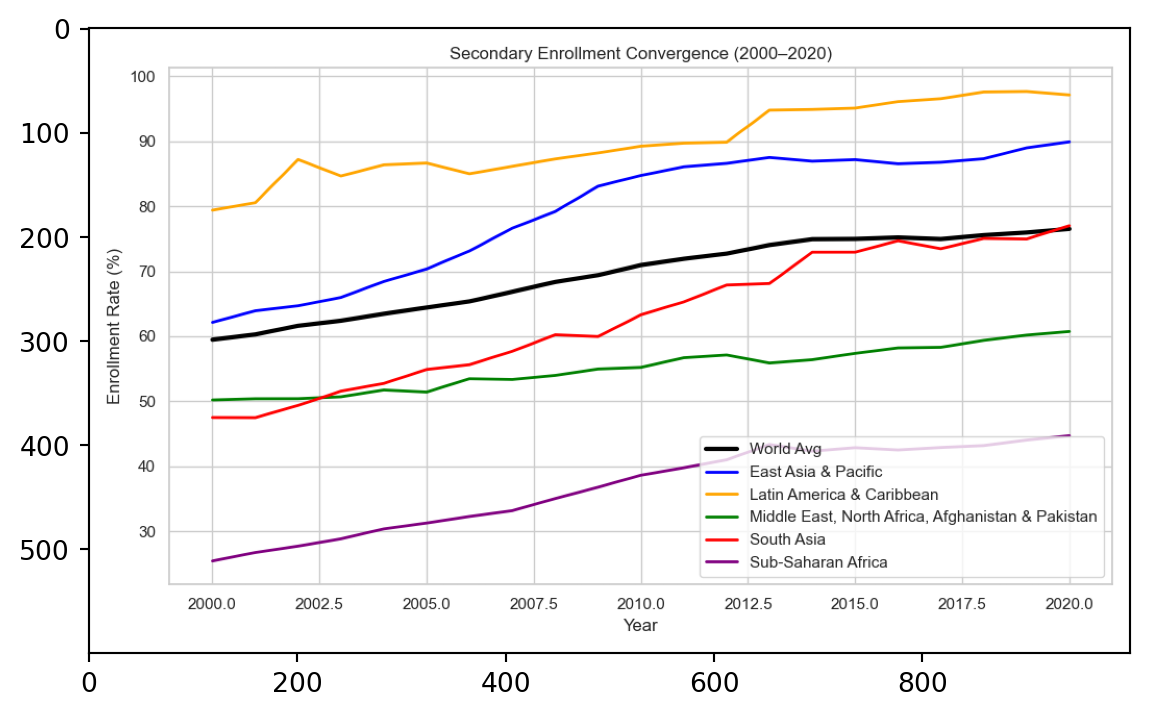

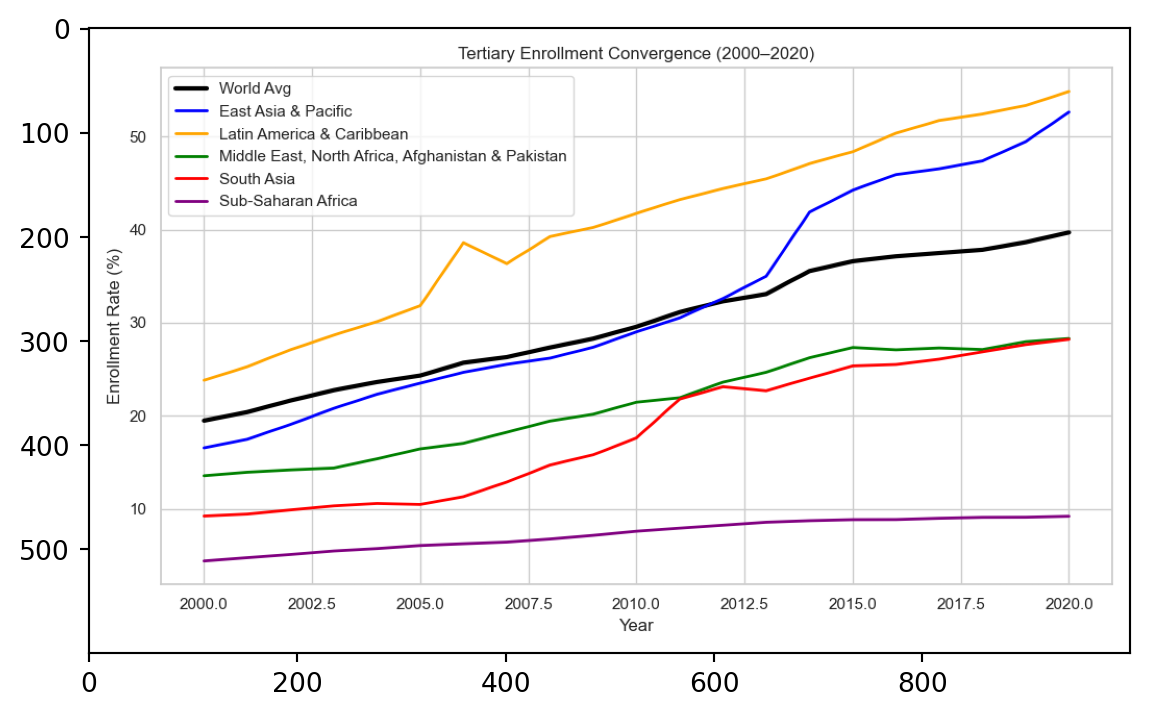

In [5]:
plt.figure()
plt.imshow(converge_line_primary)

plt.figure()
plt.imshow(converge_line_secondary)

plt.figure()
plt.imshow(converge_line_tertiary)

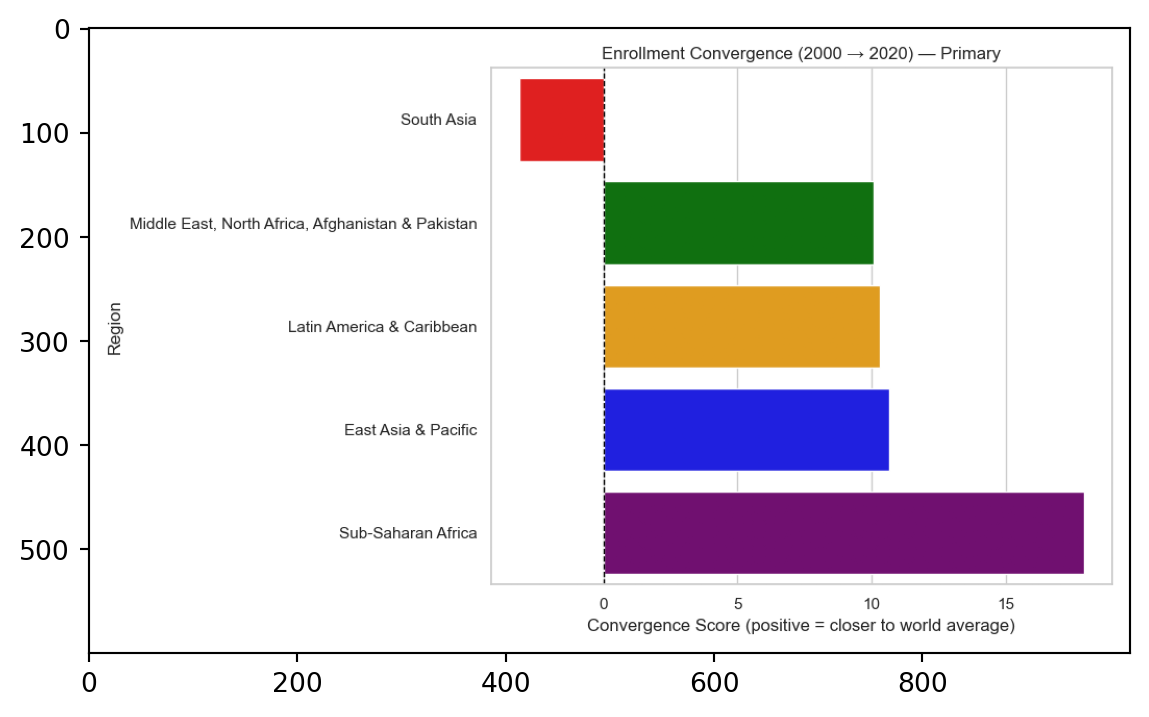

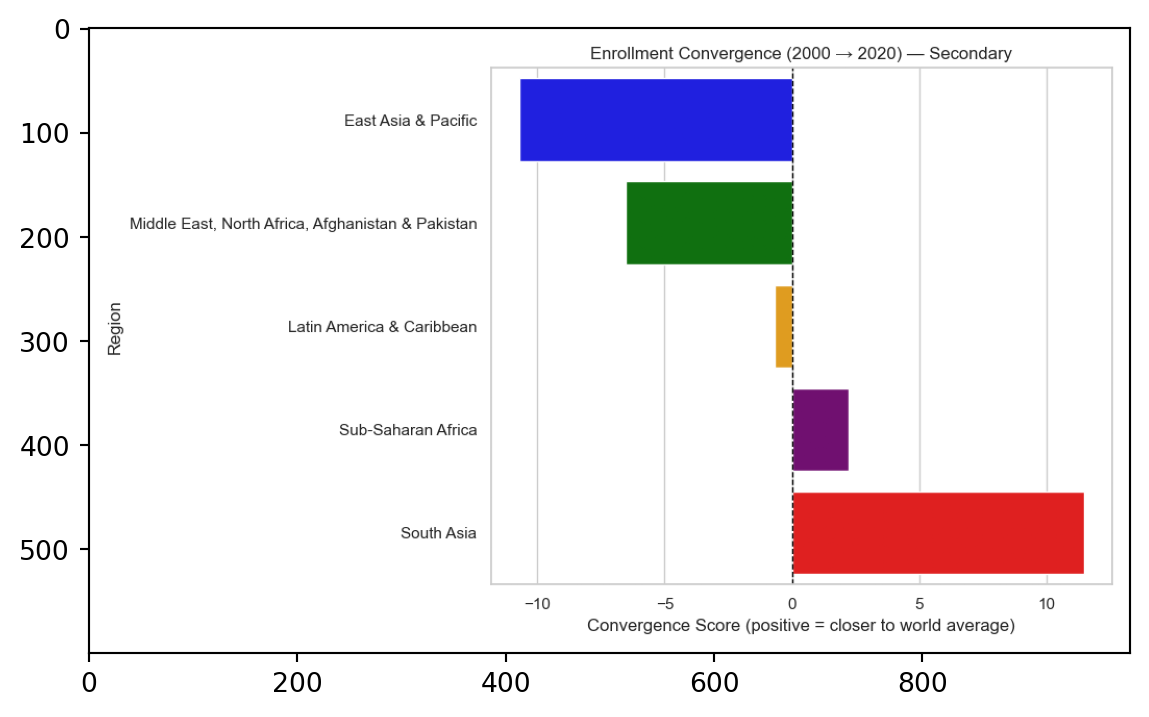

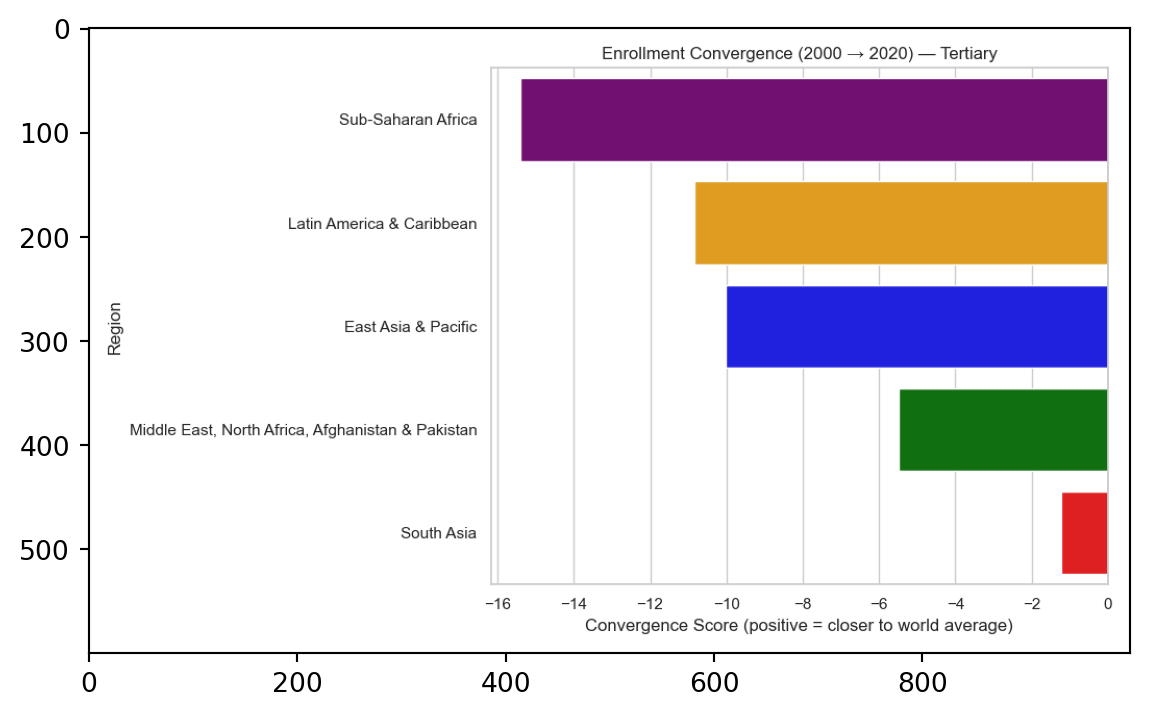

In [6]:
plt.figure()
plt.imshow(converge_bar_primary)

plt.figure()
plt.imshow(converge_bar_secondary)

plt.figure()
plt.imshow(converge_bar_tertiary)

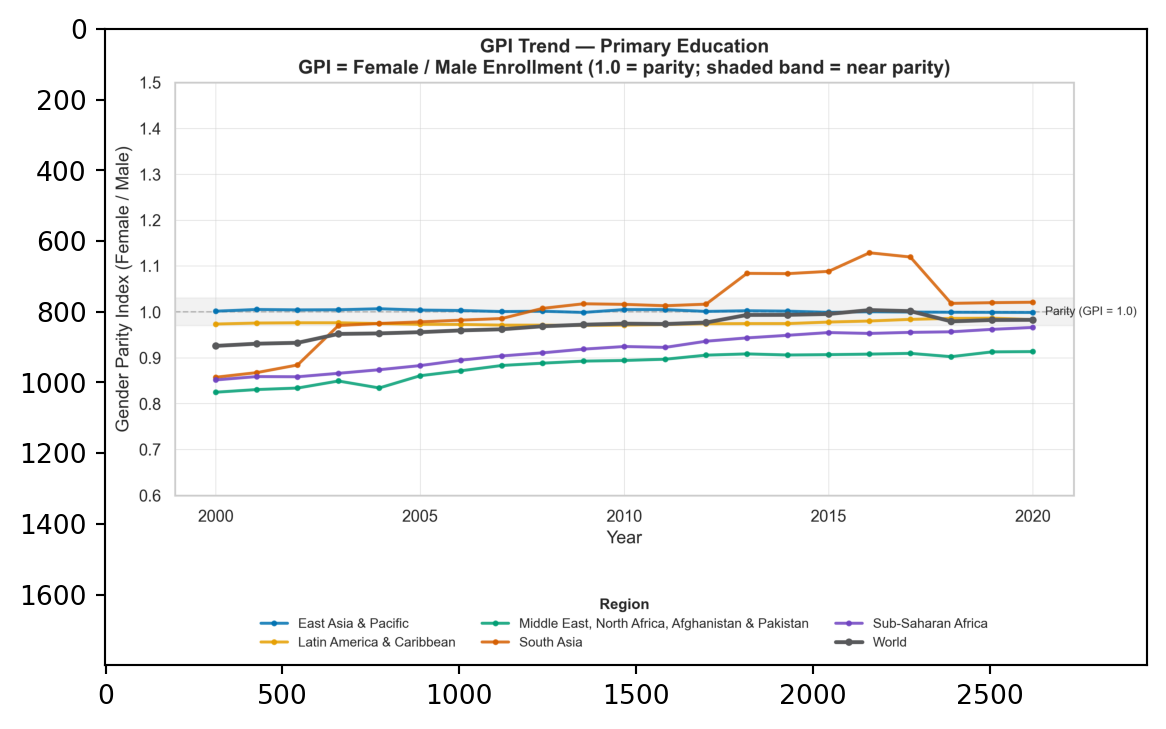

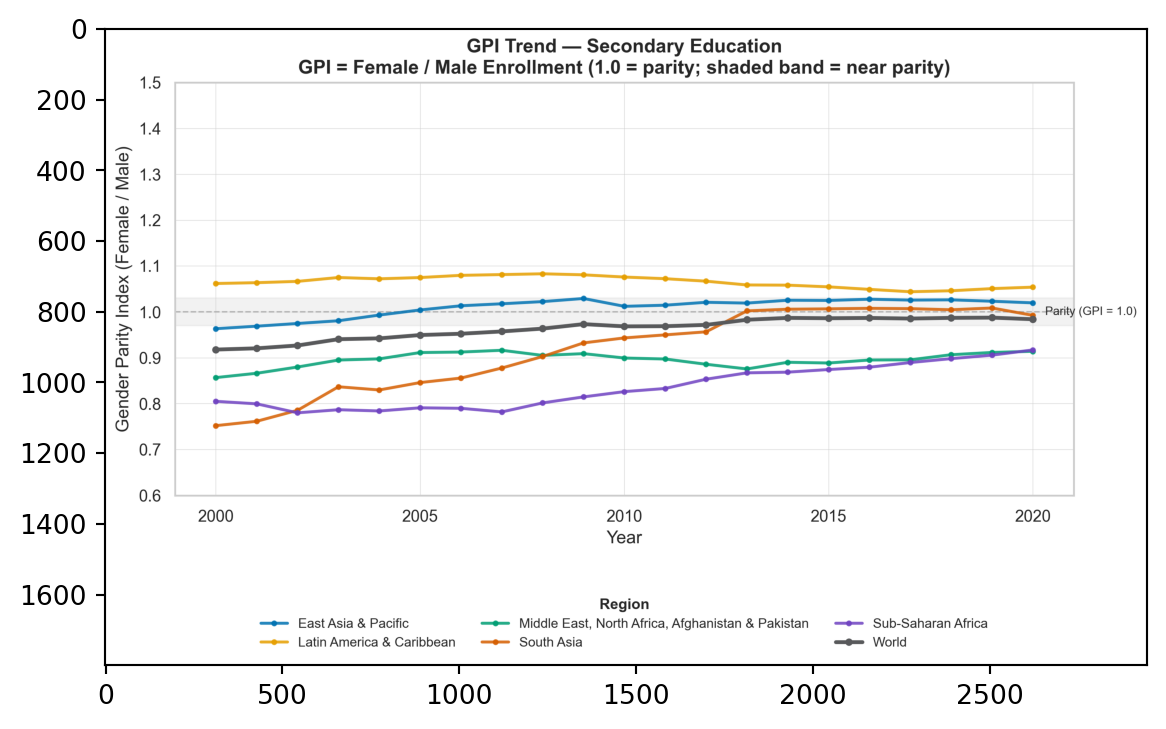

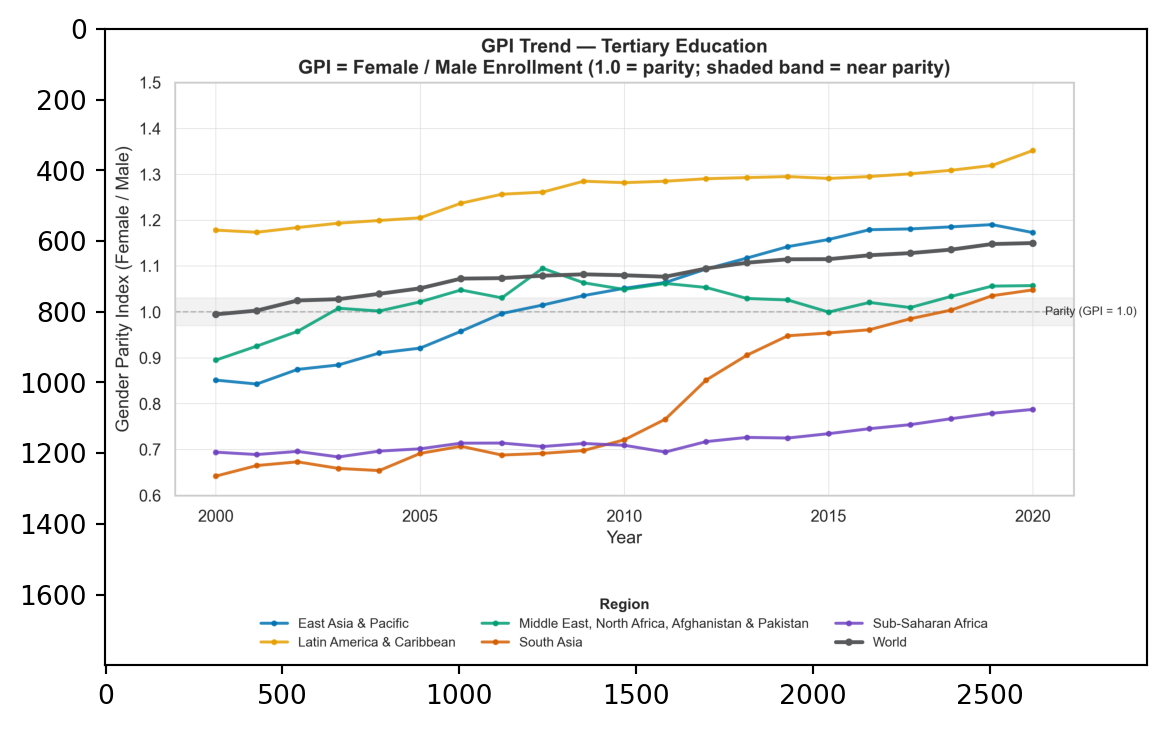

In [7]:
plt.figure()
plt.imshow(gpi_primary)

plt.figure()
plt.imshow(gpi_secondary)

plt.figure()
plt.imshow(gpi_tertiary)